# Homework 02 - Programming and critical analysis (ist1102082, ist1103252)

# Exercise 1 a.

Loading the data from the arff file and converting it into a dataframe

In [13]:
from scipy.io.arff import loadarff
import pandas as pd

# Load the data
data = loadarff('./column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Separating the input data and the output data, required for some sklean functions

In [14]:
x = df.drop('class', axis=1)
y = df['class']

First, we will apply a 10-fold stratified cross-validation with shuffling for the 
assessment of predictive models.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats

# Create 10-fold stratified cross-validation with shuffling
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


We will be comparing the performance of KNN with K =5 and naïve Bayes with Gaussian assumption. 

In [16]:
# Create classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

Then, we will perform cross-validation for both the models.

In [17]:
# Perform cross-validation and get accuracies for k-NN and Naive Bayes
knn_scores = cross_val_score(knn_classifier, x, y, cv=cv)
print("knn_scores:", knn_scores)
nb_scores = cross_val_score(nb_classifier, x, y, cv=cv)
print("nb_scores", nb_scores)

knn_scores: [0.93548387 0.80645161 0.87096774 0.93548387 0.74193548 0.87096774
 0.83870968 0.83870968 0.77419355 0.77419355]
nb_scores [0.83870968 0.87096774 0.83870968 0.87096774 0.77419355 0.83870968
 0.90322581 0.80645161 0.77419355 0.70967742]


Having the scores for both the models, we will compare them using two boxplots with the fold accuracies for each classifier.

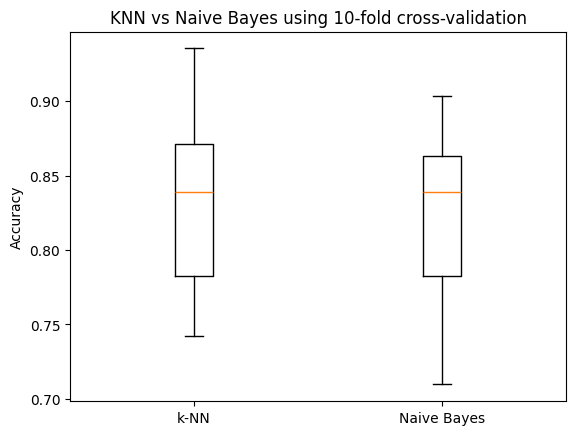

In [18]:
# Plot boxplots for fold accuracies
plt.boxplot([knn_scores, nb_scores], labels=['k-NN', 'Naive Bayes'])
plt.title('KNN vs Naive Bayes using 10-fold cross-validation')
plt.ylabel('Accuracy')
plt.show()

# Exercise 1 b.

To compare the two classifiers, we will perform a statistical test.

In [19]:
# Perform a statistical test to compare the two classifiers
t_statistic , p_value = stats.ttest_rel(knn_scores, nb_scores, alternative='greater')

# Define a significance level (default value of 0.05)
alpha = 0.05

# Check if k-NN is statistically superior to Naive Bayes
if p_value < alpha:
    print("Reject null hypothesis: k-NN is statistically superior to Naive Bayes regarding accuracy")
else:
    print("Fail to reject null hypothesis: No statistical difference between KNN and Naive Bayes")

t_statistic: 0.9214426752509264
p_value: 0.19042809062064092
Fail to reject null hypothesis: No statistical difference between KNN and Naive Bayes


# Exercise 2

First, similar to the previous exercise, we will apply a 10-fold stratified cross-validation with shuffling for the assessment of predictive models. Also, we will be instantiating a KNN classifier with K = 5 and one with K=1.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Initialize stratified k-fold cross-validation with shuffling
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize k-NN classifiers with k=1 and k=5
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

Then, we will initialize cumulative confusion matrices for both the classifiers, starting with all zeros for each cell.

In [21]:
# Initialize cumulative confusion matrices for both classifiers
cumulative_cm1 = np.zeros((3, 3))
cumulative_cm5 = np.zeros((3, 3))

Now, we will perform cross-validation for both the models and update the confusion matrices for each fold.

In [22]:

# Perform cross-validation
for train_index, test_index in kf.split(x, y):
    X_train, X_test = x.values[train_index], x.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # Fit k-NN classifiers
    knn1.fit(X_train, y_train)
    knn5.fit(X_train, y_train)
    
    # Make predictions
    y_pred1 = knn1.predict(X_test)
    y_pred5 = knn5.predict(X_test)
    
    # Calculate confusion matrices
    cm1 = confusion_matrix(y_test, y_pred1)
    cm5 = confusion_matrix(y_test, y_pred5)
    
    # Update cumulative confusion matrices
    cumulative_cm1 += cm1
    cumulative_cm5 += cm5

Plotting the difference between the two cumulative confusion matrices, we will be able to see the difference between the two classifiers.

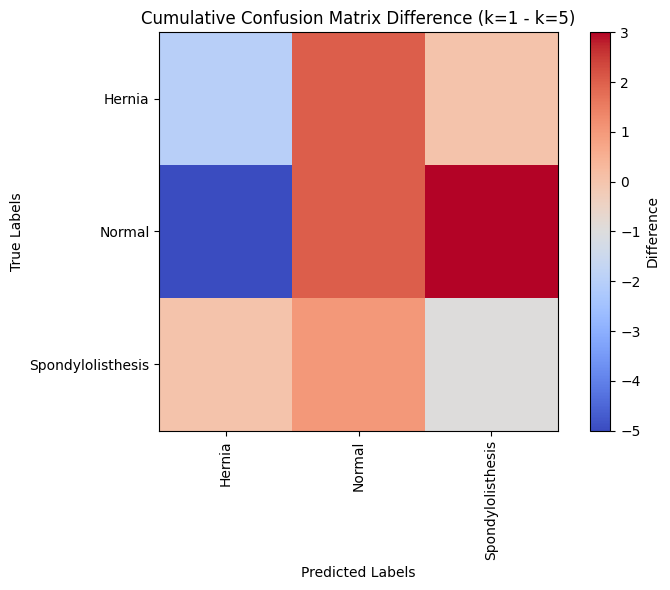

In [23]:
diff_cm = cumulative_cm1 - cumulative_cm5

plt.figure(figsize=(8, 6))
plt.imshow(diff_cm, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Difference')
plt.title('Cumulative Confusion Matrix Difference (k=1 - k=5)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

classes = (df['class'].unique())
classes.sort()

plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.tight_layout()
plt.show()

For reference, these are the confusion matrices for K=1, K=5 and the difference respectively.

In [24]:
print("Cumulative Confusion Matrix (k=1):\n", cumulative_cm1)
print("\nCumulative Confusion Matrix (k=5):\n", cumulative_cm5)
print("\nCumulative Confusion Matrix Difference (k=1 - k=5):\n", diff_cm)

Cumulative Confusion Matrix (k=1):
 [[ 37.  23.   0.]
 [ 14.  80.   6.]
 [  1.   7. 142.]]

Cumulative Confusion Matrix (k=5):
 [[ 39.  21.   0.]
 [ 19.  78.   3.]
 [  1.   6. 143.]]

Cumulative Confusion Matrix Difference (k=1 - k=5):
 [[-2.  2.  0.]
 [-5.  2.  3.]
 [ 0.  1. -1.]]


The model with K=1 is more sensitive to the training data, since it only uses the nearest neighbor to classify the data. Thus, it's also more prone to overfitting, which is why it is less accurate when it comes to the test data.

The model with K=5 is more robust to the training data, since it uses the 5 nearest neighbors to classify the data. Thus, it's also less prone to overfitting, which is why it is more accurate when it comes to the test data. We can also notice that this model is more accurate when it comes to diagnose patients with Spondylolisthesis class than the KNN with K=1.

Taking in consideration our dataset, in a medical context, the worst case scenario is when a patient is diagosed as Normal whilst carrying a disease. By analysing our difference confusion matrix,  we can conclude that such scenario is more likely to happen with the KNN with K=1 than with the KNN with K=5. Thus we can conclude, that within this context, the KNN with K=5 is a more promising classifier than the KNN with K=1.

# Exercise 3

- The ´column_diagnosis´ represents whether a patient has a medical condition (Spondylolisthesis or Hernia classes), or not (Normal class). In this case, the dataset has signs of some class imbalance, with only 60 observations of Hernia compared to 151 of Spondylolisthesis and 100 of Normal). Naïve Bayes might struggle to correctly classify positive cases due to the lack of sufficient training examples.
  
- The dataset includes various medical measurements. It can happen that some features might be strongly correlated (for example, three different features are pelvic related). Naïve Bayes assumes independence between features, so it might not capture this correlation effectively, potentially leading to suboptimal predictions, especially when both features are relevant to the diagnosis.

- Naïve Bayes is well-suited for categorical data, but it can struggle with continuous or numerical data. Since our dataset contains continuous values, this can cause some difficulties for Naïve Bayes. Other algorithms, like Gaussian Naïve Bayes (used in exercise 1.), can handle continuous data more easily.